# Programming Project #1: Hybrid Images

## Questions

*   Check results for color enhancement and color shift? Can we simply use a linear transform on all the values? Or does it need to be done on a range / masked values?
*   Can we resubmit after deadline to get bells and whistles points?



## Setup Functions

In [ ]:
# Optional, if using Google Colab w/ Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import cv2

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal

# modify to where you store your project data including utils.py
datadir = "/content/drive/My Drive/Fall 2022/CS 445/Project 1/" 

utilfn = datadir + "utils.py"
!cp "$utilfn" .
import utils

In [ ]:
# switch from notebook to inline if using colab or otherwise cannot use interactive display)
%matplotlib inline
import matplotlib.pyplot as plt

## Part I: Hybrid Images

### Function Definitions

In [ ]:
# Loads the two image files for hybrid image generation, and aligns them based on their eye locations

def prepareImages(im1_name, im2_name, eyes_1, eyes_2):
  im1_file = datadir + im1_name
  im2_file = datadir + im2_name

  im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
  im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

  pts_im1 = eyes_1 # uncomment if entering [x, y] pts manually
  # plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')
  pts_im2 = eyes_2
  # plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

  #Align images based off eyes
  im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)

  # convert to grayscale
  im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
  im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

  #Images sanity check
  # fig, axes = plt.subplots(1, 2)
  # axes[0].imshow(im1,cmap='gray')
  # axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
  # axes[1].imshow(im2,cmap='gray')
  # axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

  return [im1,im2]

In [ ]:
def hybridImage(im1, im2, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''  

    # your code goes here  

    # printGrayImages(im1, im2) # Test print

    # Creating low-pass filter
    ksize = np.int(np.ceil(sigma_low)*6+1)
    low_pass = cv2.getGaussianKernel(ksize, sigma_low) # 1D kernel
    low_pass = low_pass*np.transpose(low_pass) # 2D kernel by outer product   

    # Creating high-pass filter
    ksize = np.int(np.ceil(sigma_high)*6+1)
    high_pass = cv2.getGaussianKernel(ksize, sigma_high) # 1D kernel
    high_pass = high_pass*np.transpose(high_pass) # 2D kernel by outer product

    # Performs high pass image 1 and low pass image 2
    im_low = cv2.filter2D(im2, -1, low_pass) # Low-pass of image 2:
    im_high = im1 - cv2.filter2D(im1, -1, high_pass) # High-pass of image 1:
    im_combined = (im_low+im_high)/2 # Averaging values

    printFFT(im1, im_high, im2, im_low, im_combined) # print fft images for report
    # printGrayImages(im_low, im_high) # print filtered image for report

    fig, axes = plt.subplots(1, 3)
    axes[0].imshow(im_low,cmap='gray')
    axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
    axes[1].imshow(im_high,cmap='gray')
    axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);
    axes[2].imshow(im_combined,cmap='gray')
    axes[2].set_title('Image 3'), axes[2].set_xticks([]), axes[2].set_yticks([]);

    return im_combined

In [ ]:
# Helper function to print a set of fft images
def printFFT(*images):
  for image in images:
    plt.figure(figsize=(5,5))
    plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(image)))))

In [ ]:
# Helper function to print set of images, but they must be gray due to cmap
def printGrayImages(*images):
    for image in images:
      plt.figure(figsize=(10,10))
      plt.imshow(image,cmap='gray') 

### Image Generation

In [ ]:
#Test images, derek and cat
imgs = prepareImages('nutmeg.jpg', 'DerekPicture.jpg', np.array([[607, 290], [748, 370]]), np.array([[299,343], [439,331]]))

sigma_low = 50 # choose parameters that work for your images
sigma_high = 10

im_hybrid = hybridImage(imgs[0], imgs[1], sigma_low, sigma_high)
# plt.figure(figsize=(10,10))
# plt.imshow(im_hybrid,cmap='gray') #show image before cropping

# Crop and display image
border = np.array([[100,450],[700,1100]])
im_cropped = utils.crop_image(im_hybrid, border)
plt.figure(figsize=(10,10))
plt.imshow(im_cropped,cmap='gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

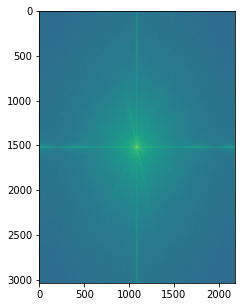

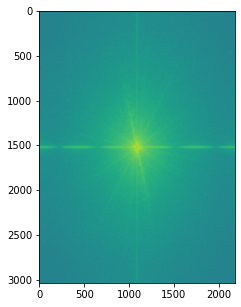

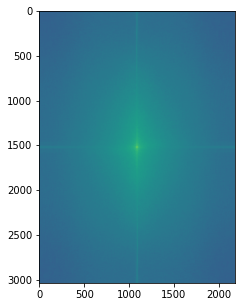

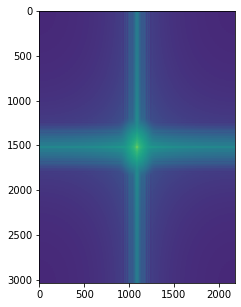

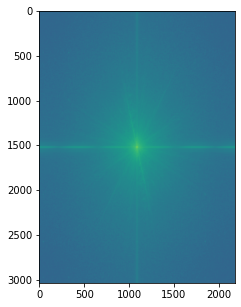

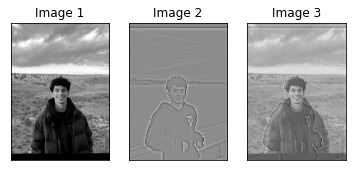

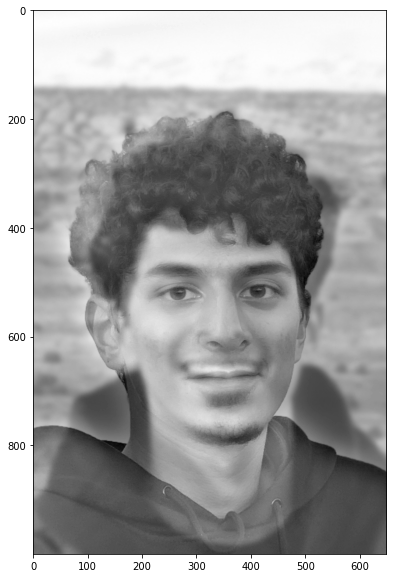

In [ ]:
# Main Result, Arman change of Expression
imgs = prepareImages('Arman 2.jpg', 'Arman.jpg', np.array([[2756, 1654], [2902, 1650]]), np.array([[1414,1924], [1617,1917]]))

sigma_low = 5 # choose parameters that work for your images
sigma_high = 25

im_hybrid = hybridImage(imgs[1], imgs[0], sigma_low, sigma_high)
# plt.figure(figsize=(10,10))
# plt.imshow(im_hybrid,cmap='gray') #show image before cropping

# Crop and display image
border = np.array([[750,1000],[1400,2000]])
im_cropped = utils.crop_image(im_hybrid, border)
plt.figure(figsize=(10,10))
plt.imshow(im_cropped,cmap='gray')

In [ ]:
# Additional Result 1, Tyler and Riley (My dog)
imgs = prepareImages('Tyler.jpg', 'Riley.jpg', np.array([[971, 1437], [1651, 1433]]), np.array([[460,676], [643,691]]))

sigma_low = 12 # choose parameters that work for your images
sigma_high = 5

im_hybrid = hybridImage(imgs[0], imgs[1], sigma_low, sigma_high)
# plt.figure(figsize=(10,10))
# plt.imshow(im_hybrid,cmap='gray') #show image before cropping

# Crop and display image
border = np.array([[200,400],[800,1200]])
im_cropped = utils.crop_image(im_hybrid, border)
plt.figure(figsize=(10,10))
plt.imshow(im_cropped,cmap='gray')

In [ ]:
# Additional Result 2, Harvey Dent and Two Face
imgs = prepareImages('Dent.jpg', 'TwoFace.jpg', np.array([[224,185], [319,178]]), np.array([[426,287], [622,273]]))

sigma_low = 3 # choose parameters that work for your images
sigma_high = 3

im_hybrid = hybridImage(imgs[1], imgs[0], sigma_low, sigma_high)
# plt.figure(figsize=(10,10))
# plt.imshow(im_hybrid,cmap='gray') #show image before cropping

# Crop and display image
border = np.array([[100,150],[700,500]])
im_cropped = utils.crop_image(im_hybrid, border)
plt.figure(figsize=(10,10))
plt.imshow(im_cropped,cmap='gray')

## Part II: Image Enhancement

#### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

### Contrast enhancement

In [ ]:
# Increases the contrast of an image by using histogram equalization on the r,g, and b channels
def contrast (im):  
  '''
    Inputs:
        im: BGR (height x width x 3) image as a numpy array.     
    Output:
        Return an image with increased contrast
    '''  
  im_RGB = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) # Concert from BGR to RGB

  r, g, b = cv2.split(im_RGB) # Split RGB space into three separate np arrays
  r_eq = cv2.equalizeHist(r)
  g_eq = cv2.equalizeHist(g)
  b_eq = cv2.equalizeHist(b)
  im_eq = cv2.merge((r_eq,g_eq,b_eq)) # Combine channels back into one np array
  
  return im_eq

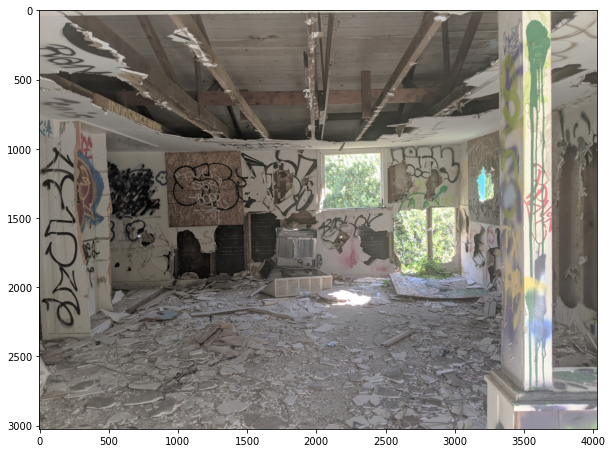

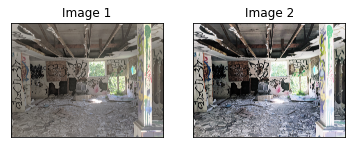

In [ ]:
# Reads an image and passes to contrast() function
im_file = datadir + 'Low_Contrast.jpg'
im = cv2.imread(im_file)
im_RGB = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) # Concert from BGR to RGB

result = contrast(im)

# Plot original image
# plt.figure(figsize=(10,10))
# plt.imshow(im_RGB, cmap = None)
# # Plot color enhanced image
# plt.figure(figsize=(10,10))
# plt.imshow(result, cmap= None)

#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im_RGB)
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(result)
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

### Color enhancement 

In [ ]:
# Increases the saturation of an image through gamma correction on the saturation channel of the HSV space.
def color (im, gamma):
  '''
  Inputs:
      im: BGR (height x width x 3) image as a numpy array.   
      gamma: The gamma factor used in gamma correction. A lower gamma value results in more color enhancement.  
  Output:
      Return an image with enhanced color saturation.
  '''  

  im_HSV = cv2.cvtColor(im, cv2.COLOR_BGR2HSV) # Split HSV space into three separate np arrays
  h,s,v = cv2.split(im_HSV)

  # Gamma correction implementation using a lookup table, based on implementation from OpenCV docs
  lookUpTable = np.empty((1,256), np.uint8)
  for i in range(256):
      lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255) #fill lookup table with gamma-adjusted values
  new_s = cv2.LUT(s, lookUpTable)
  res = cv2.merge((h,new_s,v)) # Combine channels back into one np array
  res_RGB = cv2.cvtColor(res, cv2.COLOR_HSV2RGB) # Convert from HSV space to RGB for displaying image

  return res_RGB

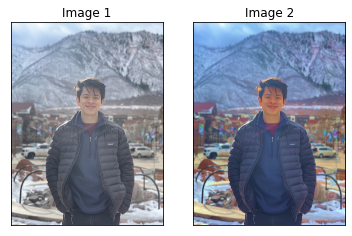

In [ ]:
# Reads an image and passes to color() function
im_file = datadir + 'Low_Color.jpg'
im = cv2.imread(im_file)
im_RGB = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

result = color(im, .5)

# Plot original and colore enhanced image
# plt.figure(figsize=(10,10))
# plt.imshow(im_RGB, cmap= None)
# plt.figure(figsize=(10,10))
# plt.imshow(result, cmap= None)

#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im_RGB)
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(result)
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

### Color shift

In [ ]:
# Applies a red shift to an image by adding a constant to all values in the a channel of the LAB color space.
def redShift (im, b_red):
  '''
  Inputs:
      im: BGR (height x width x 3) image as a numpy array.   
      b_red: The constant to add to all values in the a channel.  
  Output:
      Return an image with a red shift.
  '''  
  im_LAB = cv2.cvtColor(im, cv2.COLOR_BGR2LAB) # Convert from BGR space to LAB space
  l,a,b = cv2.split(im_LAB) # Split LAB space into three separate np arrays
  a = a + b_red # divide only those values by 2
  res = cv2.merge((l,a,b))
  res_RGB = cv2.cvtColor(res, cv2.COLOR_LAB2RGB)

  # Attempted gamme correction implementation; does not work
  # a = (a + 127).astype(np.uint8)
  # b = b.astype(np.uint8)
  # l = l.astype(np.uint8)
  # lookUpTable = np.empty((1,256), np.uint8)
  # # print(a)
  # for i in range(256):
  #     lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
  # new_a = cv2.LUT(a, lookUpTable) - 128
  # res = cv2.merge((l,new_a,b))
  # res_RGB = cv2.cvtColor(res, cv2.COLOR_LAB2RGB)

  return res_RGB

In [ ]:
# Applies a anti-yellow shift to an image by dividing all positive values in the b channel of the LAB color space by a constant.
def yelShift (im, y_red):
  '''
  Inputs:
      im: BGR (height x width x 3) image as a numpy array.  
      y_red: The constant to reduce the yellow tones by.    
  Output:
      Return an image with reduced yellow tones.
  '''  
  im_LAB = cv2.cvtColor(im, cv2.COLOR_BGR2LAB)
  l,a,b = cv2.split(im_LAB)

  # print(a)
  mask = b > 0 # check which values are less than 0.5
  b[mask] = b[mask] * y_red # divide only those values by y_red
  res = cv2.merge((l,a,b))
  res_RGB = cv2.cvtColor(res, cv2.COLOR_LAB2RGB)


  return res_RGB

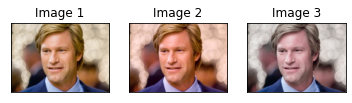

In [ ]:
# Reads an image and passes it to the redShift() and yelShift() functions 
im_file = datadir + 'Dent.jpg'
# im = cv2.imread(im_file)
im = np.float32(cv2.imread(im_file))/255
im_RGB = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

result = redShift(im, 10)
result2 = yelShift(im, 0.2)

# Print the original image and the output
# plt.figure(figsize=(10,10))
# plt.imshow(im_RGB, cmap= None)
# plt.figure(figsize=(10,10))
# plt.imshow(result, cmap= None)
# plt.figure(figsize=(10,10))
# plt.imshow(result2, cmap= None)

#Images sanity check
fig, axes = plt.subplots(1, 3)
axes[0].imshow(im_RGB)
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(result)
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);
axes[2].imshow(result2)
axes[2].set_title('Image 3'), axes[2].set_xticks([]), axes[2].set_yticks([]);

## Bells and Whistles

### Hybrid Image Color Enhancement

In [ ]:
# Same as hybridImage above, but with some tweaks to make it work with colors
def hybridImage2(im1, im2, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''  

    # your code goes here  

    # plt.figure(figsize=(10,10))
    # plt.imshow(im2,cmap=None) #low-pass
    # plt.figure(figsize=(10,10))
    # plt.imshow(im1,cmap='gray') #high-pass

    # Images come in between 0 and 1

    # Creating low-pass filter
    ksize = np.int(np.ceil(sigma_low)*6+1)
    low_pass = cv2.getGaussianKernel(ksize, sigma_low) # 1D kernel
    low_pass = low_pass*np.transpose(low_pass) # 2D kernel by outer product   

    # Creating high-pass filter
    ksize = np.int(np.ceil(sigma_high)*6+1)
    high_pass = cv2.getGaussianKernel(ksize, sigma_high) # 1D kernel
    high_pass = high_pass*np.transpose(high_pass) # 2D kernel by outer product

    # Performs high pass image 1 and low pass image 2
    # Low-pass of image 1:
    im_low = cv2.filter2D(im2, -1, low_pass) #creating low-pass filtered image
    im_high = im1 - cv2.filter2D(im1, -1, high_pass) #creating high-pass filtered image

    # Need to convert color image to uint8 data type
    im_low = (im_low*255).astype(np.uint8) 
    im_high = (im_high*255)

    # Display low and high-pass filtered images
    plt.figure(figsize=(10,10))
    plt.imshow(im_low,cmap=None)
    plt.figure(figsize=(10,10))
    plt.imshow(im_high,cmap='gray')

    low_HSV = cv2.cvtColor(im_low, cv2.COLOR_RGB2HSV) #Convert from RGB to HSV space so gray image can be added to color one
    h,s,v = cv2.split(low_HSV) # Split HSV color space into channels

    new_v = np.zeros(s.shape, s.dtype)
    new_v = ((v+im_high)/2).astype(np.uint8) # average current v channel values with high-passed filter values
    res = cv2.merge((h,s,new_v)) # Combine HSV channels back into one np array
    res_RGB = cv2.cvtColor(res, cv2.COLOR_HSV2RGB) # Convert back to RGB color space

    return res_RGB

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

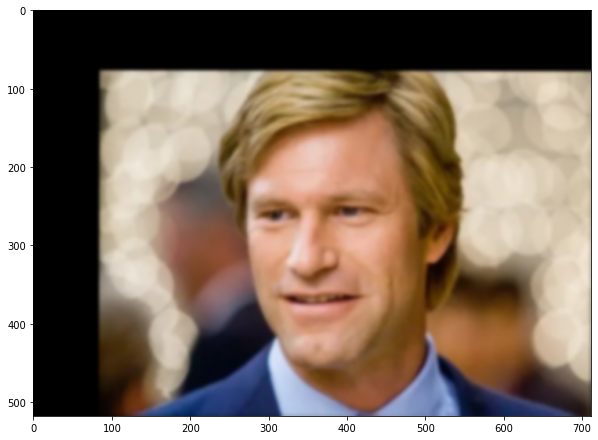

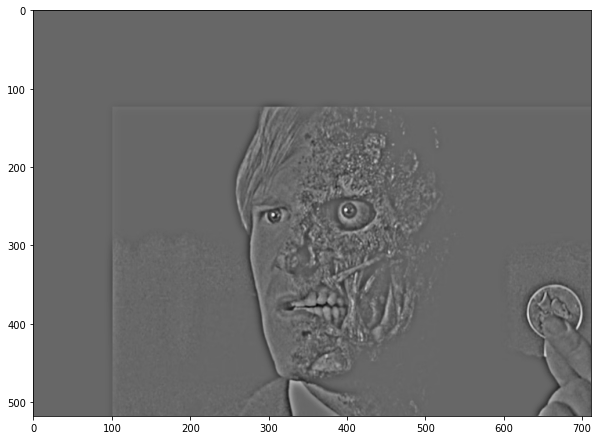

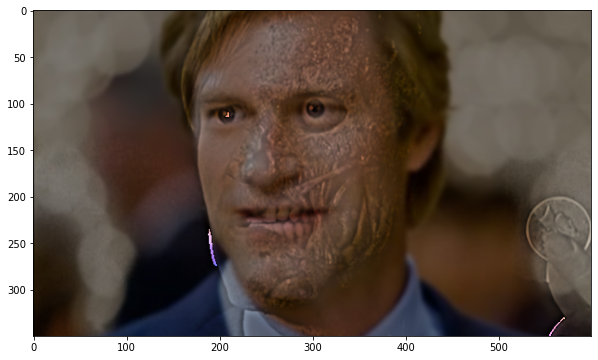

In [ ]:
# Hybrid Image Color Enhancement
im1_file = datadir + 'Dent.jpg'
im2_file = datadir + 'TwoFace.jpg'
# im1 = cv2.imread(im1_file)
# im2 = cv2.imread(im2_file)
pts_im1 = np.array([[224,185], [319,178]])
pts_im2 = np.array([[426,287], [622,273]])
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)
im1_RGB = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB) # to low-pass, in color
im2_RGB = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) #to high pass, in b&w

# Alternate code to try sending high-pass image in color instead
# im1_RGB = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) # to low-pass, in b&w
# im2_RGB = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB) #to high-pass, in color

# printImages(im1_RGB, im2_RGB)

sigma_low = 2 # choose parameters that work for your images
sigma_high = 5

im_hybrid = hybridImage2(im2_RGB/255, im1_RGB/255, sigma_low, sigma_high)
# plt.figure(figsize=(10,10))
# plt.imshow(im_hybrid,cmap=None) #show image before cropping

# Crop image
border = np.array([[100,150],[700,500]])
im_cropped = utils.crop_image(im_hybrid, border)
plt.figure(figsize=(10,10))
plt.imshow(im_cropped,cmap='gray')

### Gaussian and Laplacian Pyramids